# Credit Scoring with Missing Data Analysis

This notebook demonstrates the analysis of credit scoring data with a focus on handling Missing Not At Random (MNAR) data. We'll compare different methods for handling missing data and evaluate their impact on model performance.

## Table of Contents
1. [Setup and Data Loading](#1.-Setup-and-Data-Loading)
2. [Data Preprocessing](#2.-Data-Preprocessing)
3. [Missing Data Analysis](#3.-Missing-Data-Analysis)
4. [Handling Missing Data](#4.-Handling-Missing-Data)
5. [Model Training](#5.-Model-Training)
6. [Model Evaluation](#6.-Model-Evaluation)
7. [Results Comparison](#7.-Results-Comparison)
8. [Conclusions](#8.-Conclusions)

## 1. Setup and Data Loading

First, let's import the necessary libraries and load our data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add the 'src' directory to the Python path
import sys
import os
sys.path.append(os.path.abspath('../src'))

# Import our custom modules
# from src.missing_data_handler import MissingDataHandler
# from src.model import CreditScoringModel
# from src.evaluation import ModelEvaluator
from utils import preprocess_data, plot_missingness, plot_feature_distributions, create_correlation_matrix, split_data

# Set random seed for reproducibility
np.random.seed(42)


# Load the three datasets with different missing data mechanisms
data_mar = pd.read_csv('../data_mar.csv')
data_mcar = pd.read_csv('../data_mcar.csv')
data_mnar = pd.read_csv('../data_mnar.csv')
print(f"MAR Dataset shape: {data_mar.shape}")
print(f"MCAR Dataset shape: {data_mcar.shape}")
print(f"MNAR Dataset shape: {data_mnar.shape}")



MAR Dataset shape: (1000, 11)
MCAR Dataset shape: (1000, 11)
MNAR Dataset shape: (1000, 11)


## 2. Data Preprocessing

Let's examine our data and perform initial preprocessing steps.

In [2]:
# Display basic information about the MCAR dataset
print("Dataset Info for MCAR:")
data_mcar.info()

print("\nSummary Statistics for MCAR:")
data_mcar.describe()
# Display basic information about the MAR dataset
print("Dataset Info for MAR:")
data_mar.info()

print("\nSummary Statistics for MAR:")
data_mar.describe()
# Display basic information about the MNAR dataset
print("Dataset Info for MNAR:")
data_mnar.info()

print("\nSummary Statistics for MNAR:")
data_mnar.describe()

Dataset Info for MCAR:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  775 non-null    float64
 1   feature_1  1000 non-null   float64
 2   feature_2  1000 non-null   float64
 3   feature_3  1000 non-null   float64
 4   feature_4  1000 non-null   float64
 5   feature_5  1000 non-null   float64
 6   feature_6  1000 non-null   float64
 7   feature_7  1000 non-null   float64
 8   feature_8  1000 non-null   float64
 9   feature_9  1000 non-null   float64
 10  target     1000 non-null   float64
dtypes: float64(11)
memory usage: 86.1 KB

Summary Statistics for MCAR:
Dataset Info for MAR:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  800 non-null    float64
 1   feature_1  1000 non-null  

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,789.000000
mean,1.468296,1.567074,1.717891,1.572873,2.800319,1.562181,1.621417,1.502517,1.485106,2.040264,0.427123
std,1.129163,1.143300,1.250512,1.123346,2.133793,1.219414,1.184727,1.155885,1.138858,1.460754,0.494974
min,0.000896,0.000152,0.003444,0.002226,0.006055,0.000658,0.000116,0.000066,0.000441,0.002997,0.000000
25%,0.583530,0.648535,0.684025,0.648935,1.098777,0.632898,0.723596,0.584808,0.617340,0.902458,0.000000
50%,1.190879,1.380120,1.491317,1.369987,2.361372,1.284160,1.401474,1.255878,1.227303,1.754262,0.000000
75%,2.145394,2.257988,2.555105,2.255166,4.048184,2.249853,2.305453,2.154786,2.147240,2.884499,1.000000
max,5.824009,7.011590,7.409478,5.517741,11.818684,7.173891,8.712973,6.092681,7.544301,7.596189,1.000000


In [3]:
# # Preprocess the data
# processed_df = preprocess_data(df_rejected_gz)
# print(f"Processed dataset shape: {processed_df.shape}")

## 3. Missing Data Analysis

Let's analyze the patterns of missing data in our dataset.

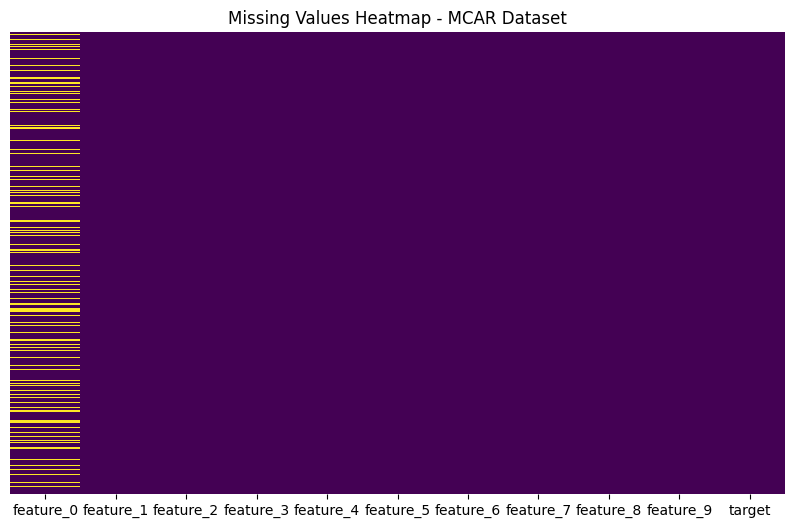

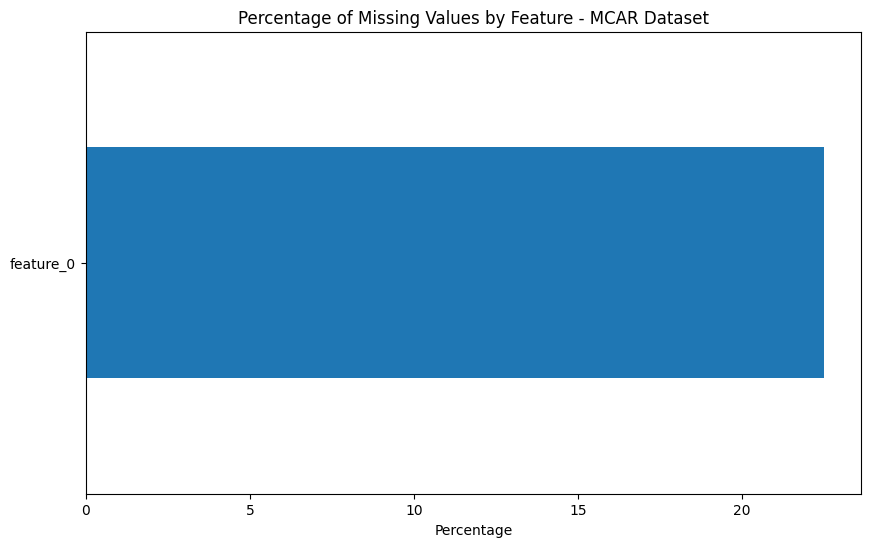

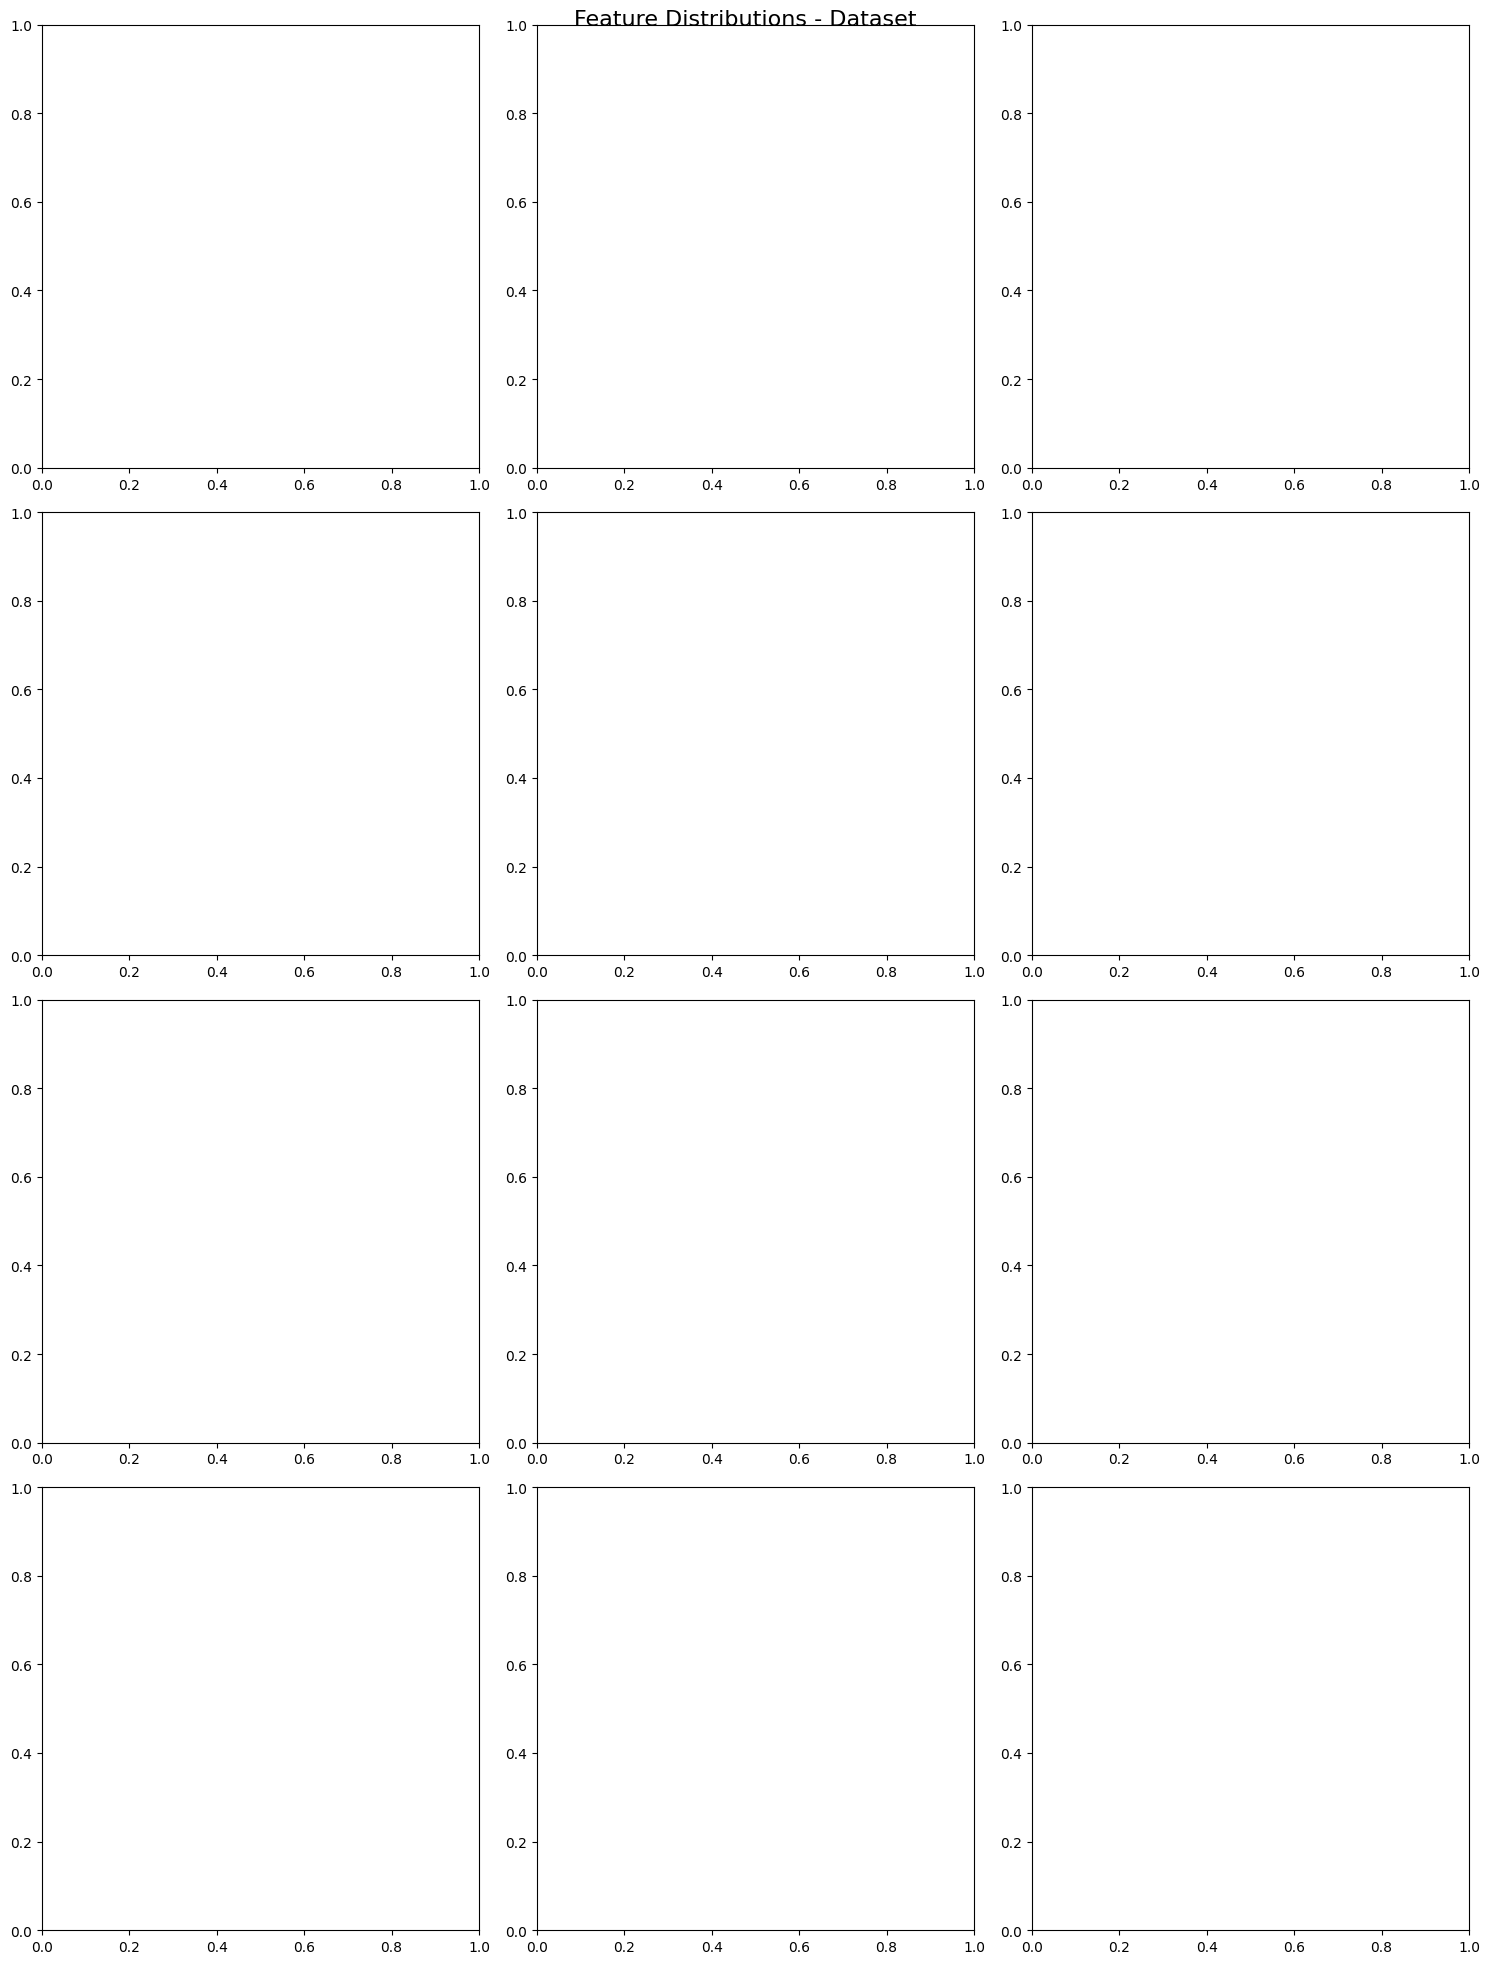

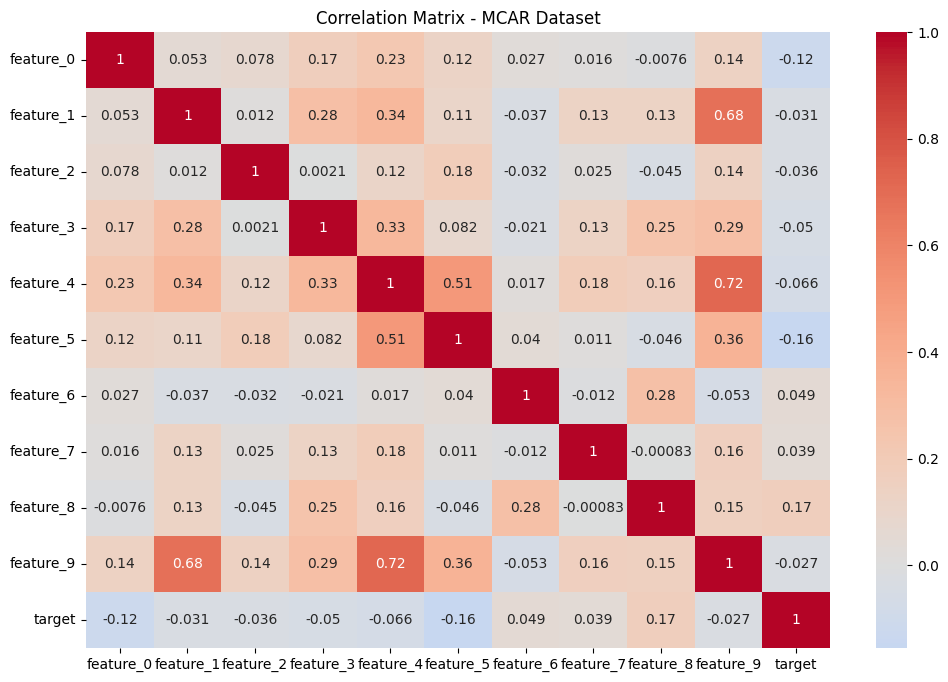

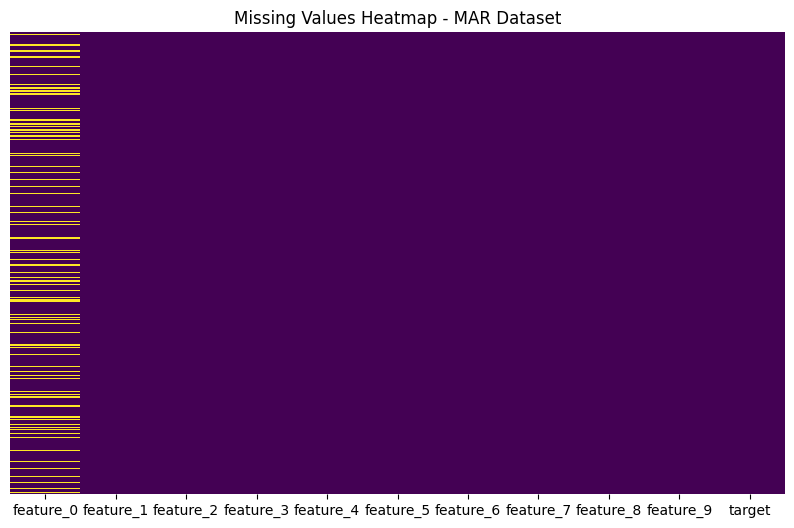

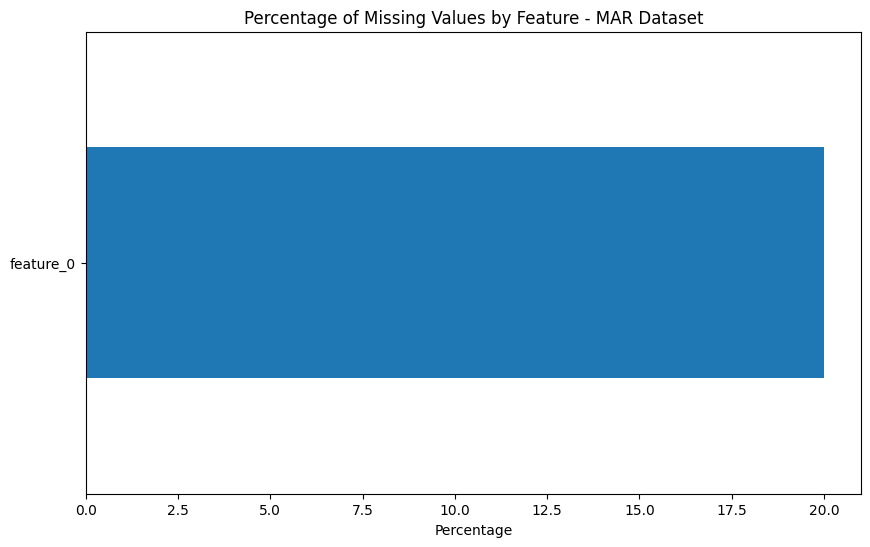

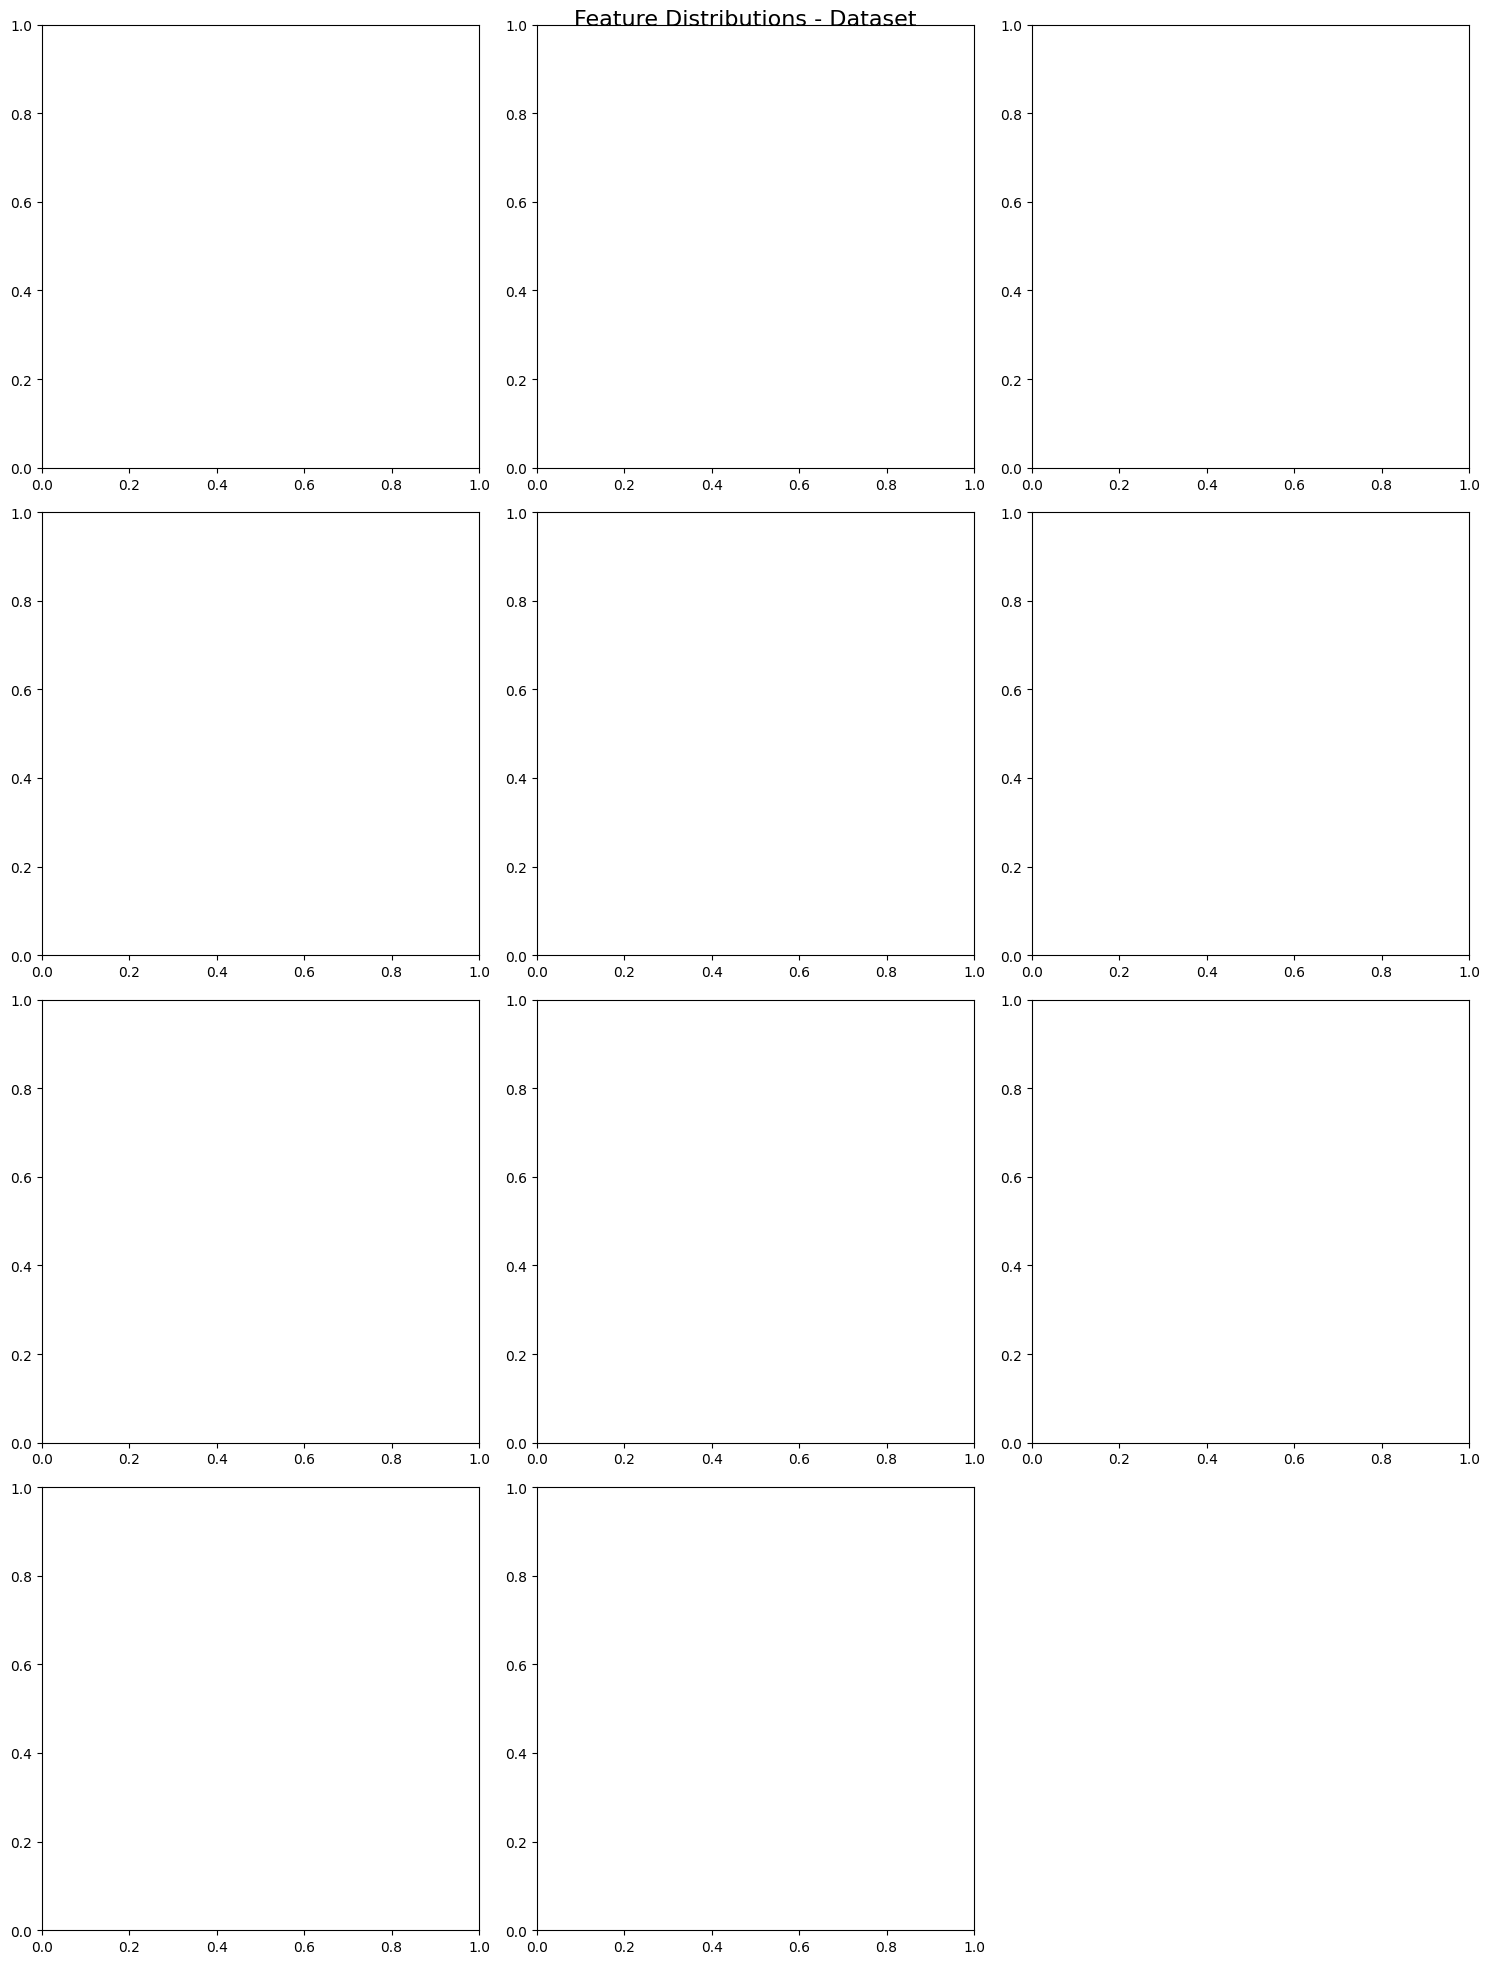

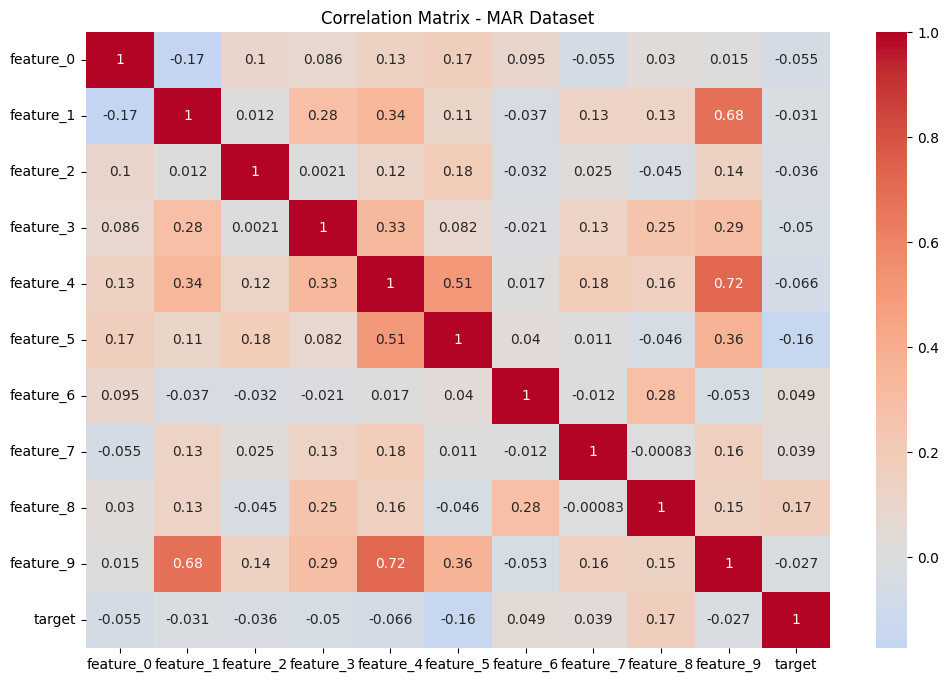

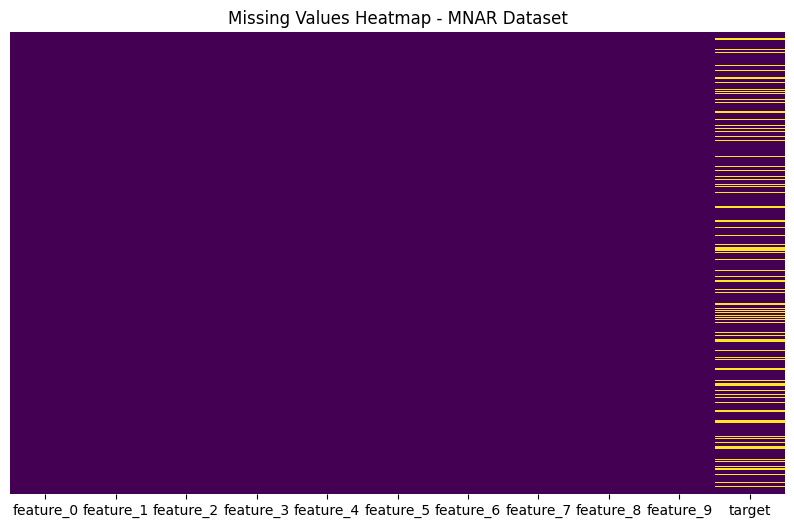

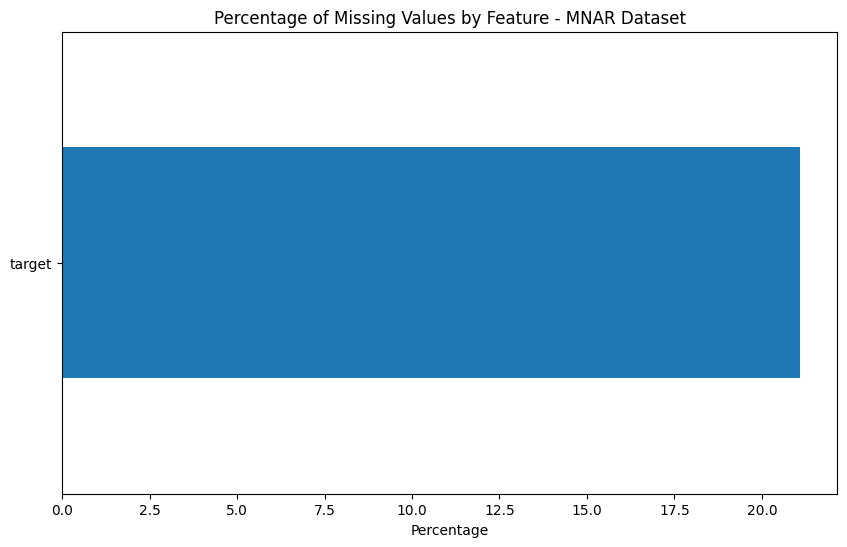

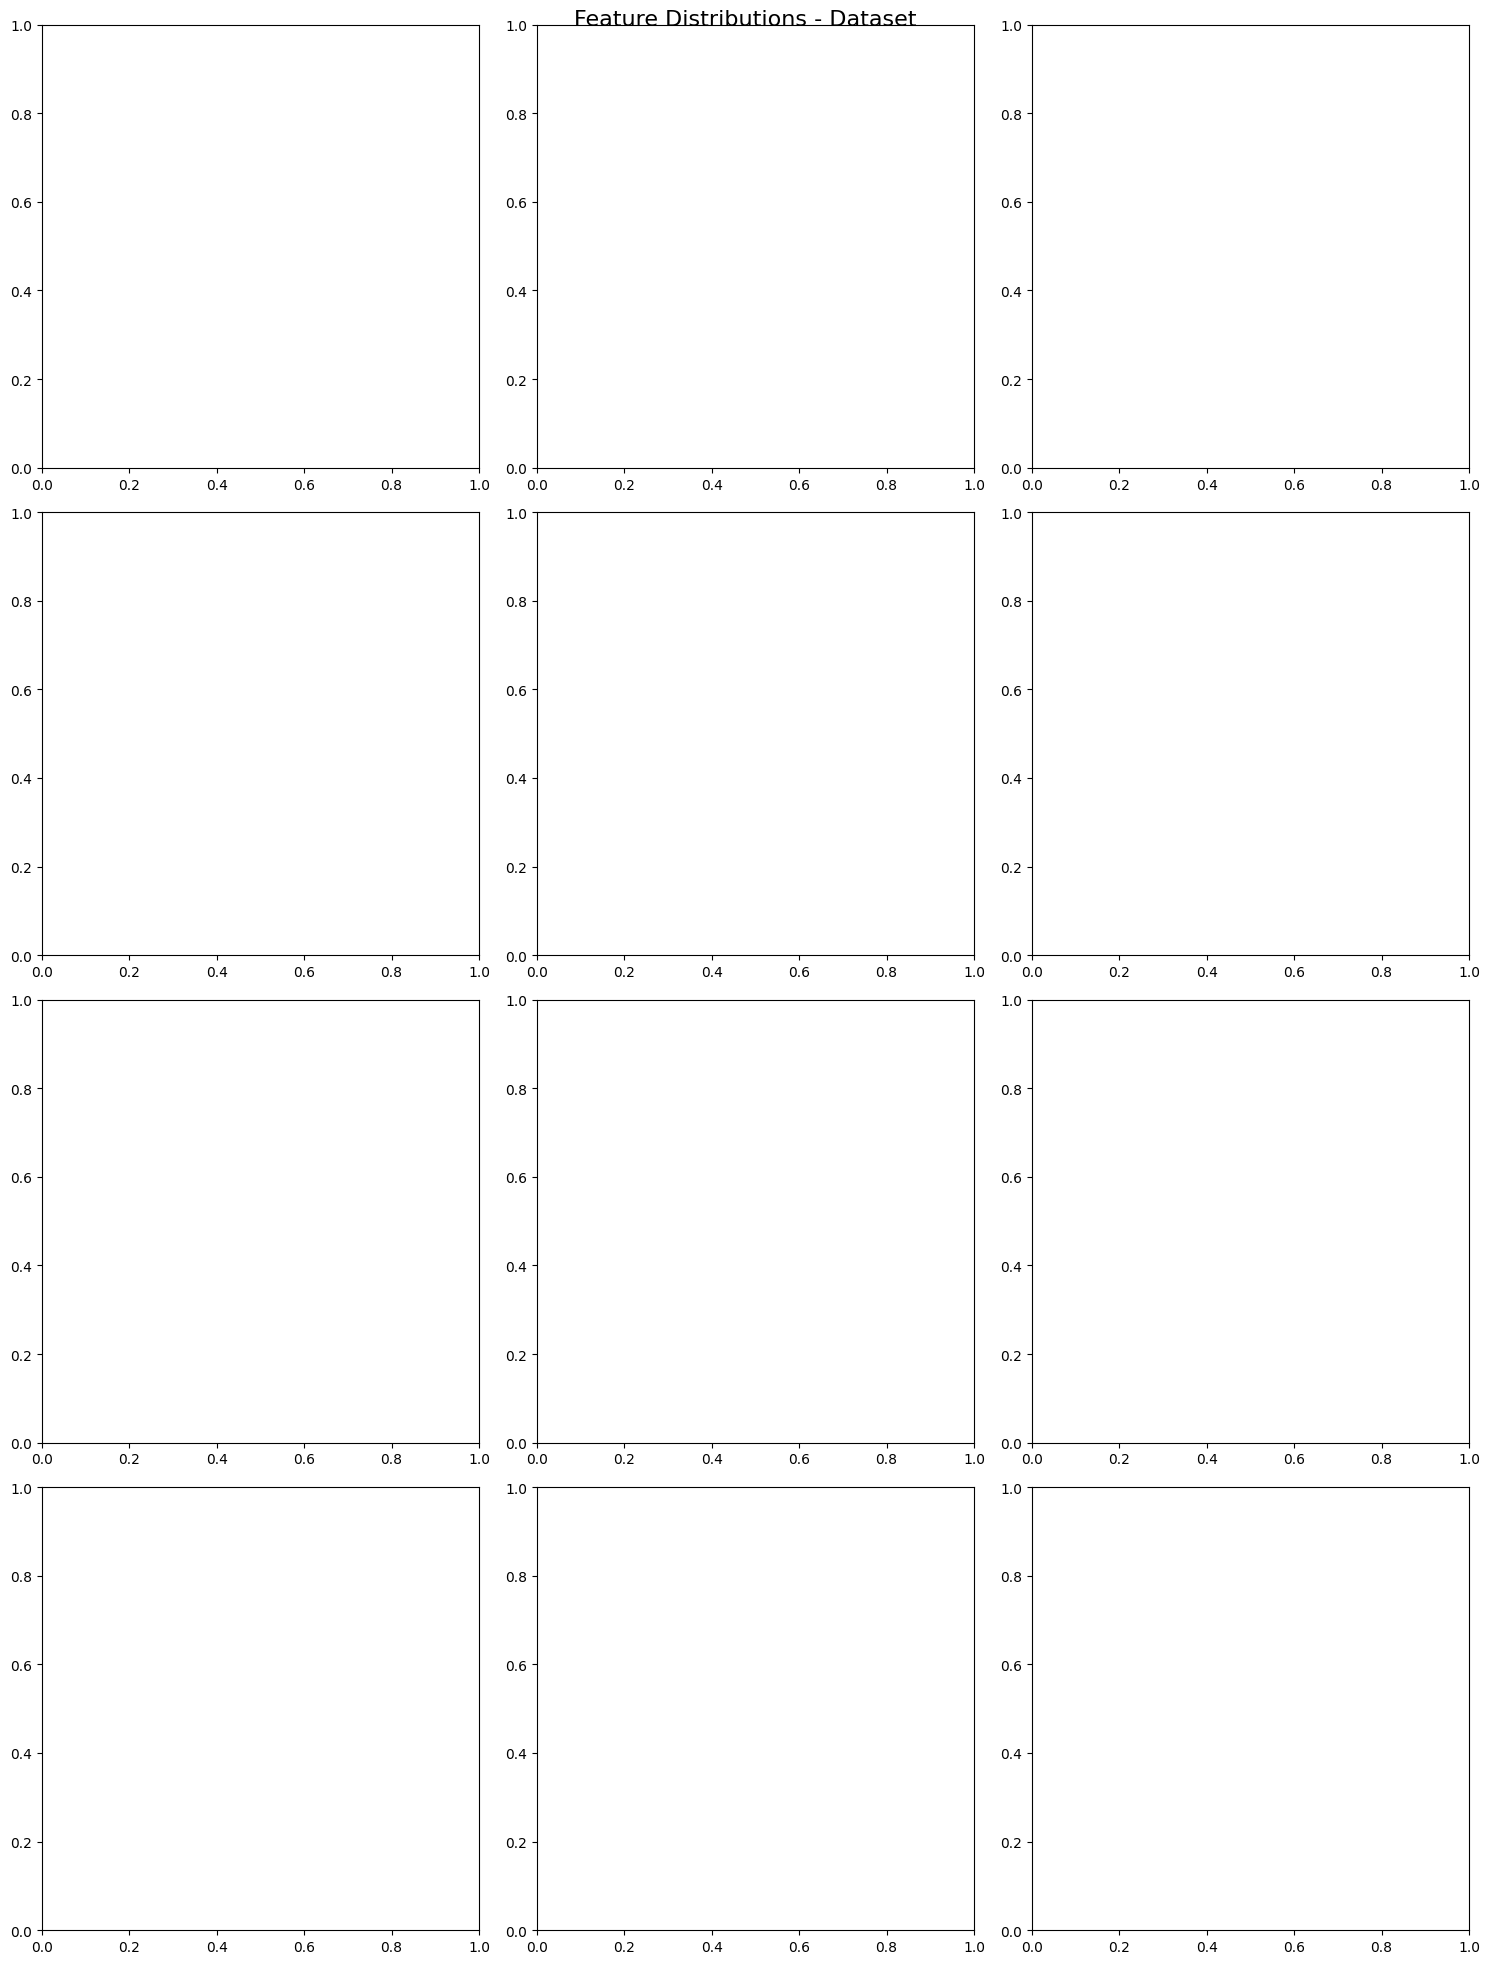

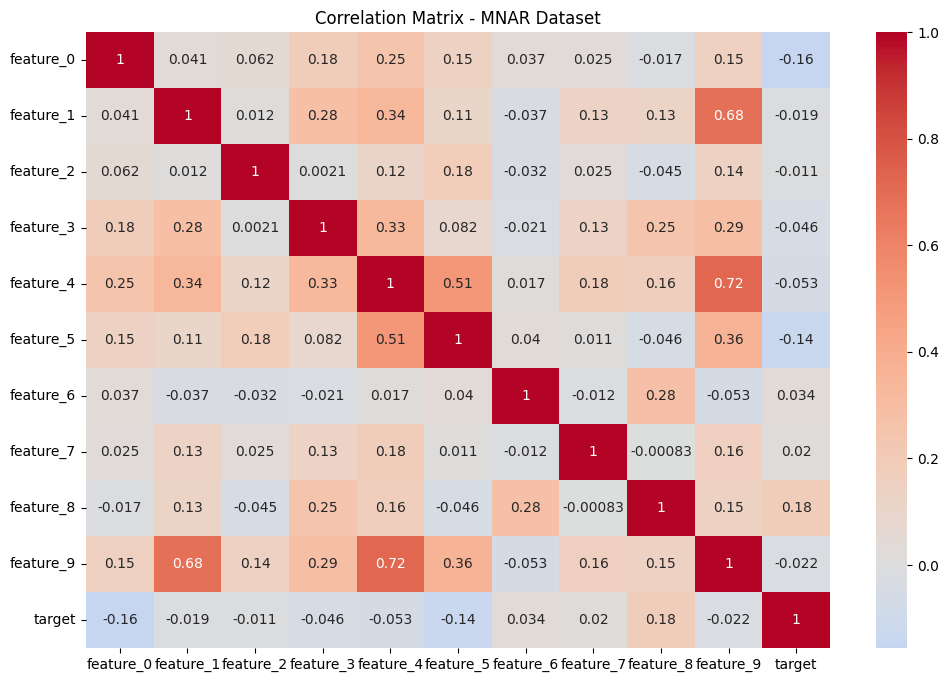

In [4]:
# Visualize missing data patterns
plot_missingness(data_mcar, "MCAR Dataset")

# Plot feature distributions
plot_feature_distributions(data_mcar, "MCAR Dataset")

# Create correlation matrix
create_correlation_matrix(data_mcar, "MCAR Dataset")

# Visualize missing data patterns
plot_missingness(data_mar, "MAR Dataset")

# Plot feature distributions
plot_feature_distributions(data_mar, "MAR Dataset")

# Create correlation matrix
create_correlation_matrix(data_mar, "MAR Dataset")

# Visualize missing data patterns
plot_missingness(data_mnar, "MNAR Dataset")

# Plot feature distributions
plot_feature_distributions(data_mnar, "MNAR Dataset")

# Create correlation matrix
create_correlation_matrix(data_mnar, "MNAR Dataset")

## 4. Handling Missing Data

We'll apply different methods to handle missing data and create multiple versions of our dataset.

In [5]:
# Initialize missing data handler
handler = MissingDataHandler()

# Apply different missing data handling methods
df_mean = handler.mean_imputation(processed_df.copy(), 'target')
df_heckman = handler.heckman_correction(processed_df.copy(), 'target', 'income')
df_basl = handler.basl_method(processed_df.copy(), 'target')

# Store datasets in a dictionary
datasets = {
    'mean_imputation': df_mean,
    'heckman_correction': df_heckman,
    'basl_method': df_basl
}

NameError: name 'MissingDataHandler' is not defined

## 5. Model Training

Now we'll train models using each version of our dataset.

In [ ]:
# Initialize model and evaluator
model = CreditScoringModel()
evaluator = ModelEvaluator()

# Dictionary to store results
results = {}

# Train and evaluate models for each dataset
for method_name, dataset in datasets.items():
    print(f"\nProcessing {method_name}...")
    
    # Prepare data
    X = dataset.drop('target', axis=1)
    y = dataset['target']
    X_train, X_test, y_train, y_test = split_data(X, y)
    
    # Train model
    model.train(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Evaluate
    results[method_name] = evaluator.evaluate_model(y_test, y_pred, y_pred_proba)

## 6. Model Evaluation

Let's evaluate the performance of each model.

In [ ]:
# Compare model performances
evaluator.compare_models(results)

# Print detailed results
for method_name, metrics in results.items():
    print(f"\nResults for {method_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

## 7. Results Comparison

Let's analyze the differences between the methods.

In [ ]:
# Create comparison visualizations
metrics_to_compare = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
evaluator.compare_models(results, metrics=metrics_to_compare)

## 8. Conclusions

Based on our analysis:

1. **Method Comparison**:
   - [Fill in observations about which method performed best]
   - [Note any interesting patterns in the results]

2. **Practical Implications**:
   - [Discuss what these results mean for credit scoring]
   - [Note any limitations or areas for future research]

3. **Recommendations**:
   - [Provide specific recommendations based on the results]
   - [Suggest best practices for handling missing data in credit scoring]